In [2]:
#导入包
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
df=pd.read_excel("C:\\Users\\有福有德\\Desktop\\上海统计分析python20200513\\data\\bankloan_binning.xlsx")
print(df.head(2))
xtrain,xtest,ytrain,ytest=train_test_split(df.iloc[:,[2,3,4,5,6,7,8,9]],df.iloc[:,-1]
                                           ,test_size=0.2,random_state=0)#train_size=0.8
xtrain1,xvalid,ytrain1,yvalid=train_test_split(xtrain,ytrain
                                           ,test_size=0.2,random_state=0)#train_size=0.8

   ID  age  age_group  ed  employ  address  income  debtinc  creddebt  \
0   1   41          3   3      17       12    35.9    11.90  0.504108   
1   2   30          2   1      13        8    46.7    17.88  1.352694   

    othdebt  default  
0  3.767992        0  
1  6.997266        0  


In [3]:
#-----------python数据处理标准流程------------
#第一、导入包和对应的类
#第二、实例化
#第三、拟合数据
#第四、评估模型
#第五、预测评分

#分类预测
from sklearn import linear_model
log=linear_model.LogisticRegression(solver="lbfgs",C=3)
#"lbfgs"慢但稳健；"newton-cg"不能处理多分类,但比lbfgs快；"sag"处理大型的列和行，二分类；
log.fit(xtrain,ytrain)#拟合训练集数据
log.score(xtest,ytest)#非监督模型是transform
y_log=log.predict(xtest)#predict_proba

log.coef_#回归系数
exp=np.exp(log.coef_)#or值，解释业务关系
gamma=(exp-1)/(exp+1)#gamma值，解释变量相关强度
print([exp,gamma])

# 老(新)样本预测
x1=np.array([[2,1,3.767992,3.90,0.504108,3.767992,2.90,1.504108],
             [3,4,0.767992,3.90,1.504108,3.767992,0.90,1.504108]])
pdata=pd.DataFrame(log.predict_proba(x1))#fit.predict表示预测值
pdata.head(6)


[array([[1.05144733, 1.03614304, 0.83083869, 0.91294581, 0.9957268 ,
        1.0973094 , 1.61351223, 1.01912845]]), array([[ 0.02507855,  0.01775074, -0.09239553, -0.04550792, -0.00214118,
         0.04639726,  0.23474626,  0.00947362]])]


E:\python\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


,0,1
0,0.548651,0.451349
1,0.609137,0.390863


In [4]:
#使用api包统一输出所有统计量
import statsmodels.api as sm

X=pd.DataFrame(df.iloc[:,2:10])
y=pd.DataFrame(df.iloc[:,-1])
sm.Logit(y,X).fit().summary()


Optimization terminated successfully.
         Current function value: 0.408216
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4992
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 May 2020   Pseudo R-squ.:                  0.2758
Time:                        07:10:02   Log-Likelihood:                -2041.1
converged:                       True   LL-Null:                       -2818.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age_group     -0.0921      0.049     -1.873      0.061      -0.189       0.004
ed            -0.0420      0.040     -1.049      0.294      -0.120       0.037
employ        -0.1969      0.011    -18.487      0.000      -0.218      -0.176
address       -0.0961      0.009    -11.082      0.000      -0.113      -0.079
income        -0.0126      0.003     -4.056      0.000      -0.019      -0.007
debtinc        0.0474      0.008      6.206      0.000       0.032       0.062
creddebt       0.5543      0.034     16.075      0.000       0.487       0.622
othdebt        0.1030      0.021      4.809      0.000       0.061       0.145
==============================================================================
"""

              precision    recall  f1-score   support

         非违约       0.85      0.92      0.88       767
          违约       0.62      0.45      0.52       233

    accuracy                           0.81      1000
   macro avg       0.74      0.68      0.70      1000
weighted avg       0.79      0.81      0.80      1000



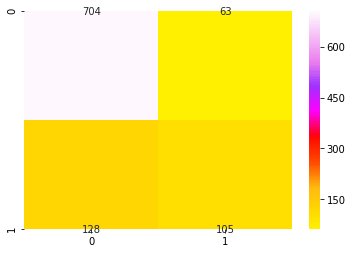

In [12]:
#-----------混淆矩阵与预测-----------
#(1)预测分类
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm=confusion_matrix(ytest,y_log)
print(classification_report(ytest,y_log,target_names=['非违约','违约']))
sns.heatmap(cm,fmt="d",cmap="gist_ncar",annot=True,center=True)#annot将数值显示在单元格里

In [14]:
#-----------交叉验证-----------
from sklearn.model_selection import cross_val_score,LeaveOneOut,KFold,GroupKFold
scores1=cross_val_score(log,xtrain,ytrain,cv=3,scoring="f1")#默认是正确率，参数scoring="precision"or"recall",'f1'
print('交叉验证：%s'%scores1);
print('平均交叉验证得分：%s'% np.mean(scores1))

交叉验证：[0.54901961 0.53658537 0.54901961]
平均交叉验证得分：0.5448748605133109


E:\python\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [16]:
#-----------#6.网格搜索-----------
from sklearn.model_selection import GridSearchCV

#GridSearchCV网格搜索
parameters={'solver':['newton-cg','lbfgs', 'liblinear','sag','saga'],
            #'penalty':['l2','l1'],#l2岭回归，l1为lasso，强调可解释
            'C':[0.3,1,2]        
           }
#线性回归中叫algha系数，logistic和svm叫C。惩罚系数的倒数，值越小,正则化越大（惩罚越大），修正过拟合，共线性
grid_search=GridSearchCV(log,parameters,cv=3,n_jobs=-1)#scoring='accuracy'
grid_search.fit(xtrain,ytrain)
print("最优得分：%s" %grid_search.best_score_)
print("测试得分：%s" %grid_search.score(xtest,ytest))
print("全部及最优系数：%s" %grid_search.best_estimator_)
print("定义搜索的最优系数：%s" %grid_search.best_params_)

#最后使用最优系数构建模型
# model=grid_search.best_estimator_
# ypre=model.fit(xtrain,ytrain).predict_proba(xtrain)
# ypre[:6]

最优得分：0.80875
测试得分：0.81
全部及最优系数：LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
定义搜索的最优系数：{'C': 0.3, 'solver': 'liblinear'}


array([[0.97428539, 0.02571461],
       [0.00293531, 0.99706469],
       [0.93836995, 0.06163005],
       [0.99165895, 0.00834105],
       [0.9902532 , 0.0097468 ],
       [0.82910195, 0.17089805]])

In [20]:
#==============7.pipeline管道=============
#Pipeline需要命名；make_pipeline不需要命名

#----------------标准管道---------------------------
#分类器前的预分析：特征提取（主成分）、特征选择（变量选择）、缩放（各种变量变换）、分类（聚类）、缺失值
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from missingpy import MissForest

pipe = Pipeline([ 
               ("缺失值1",MissForest(n_estimators=2,min_samples_leaf=9000)),
               ("规范化2",MinMaxScaler(feature_range=(0,1))),
               ("特征选择3",SelectFromModel(LinearSVC(penalty="l2",random_state=0),max_features=3)),
               ("模型4",RandomForestClassifier(oob_score=True,random_state=0))
               ])
rf_clf=pipe.fit(xtrain,ytrain)

print('缺失值统计量:',pipe.named_steps['缺失值1'].statistics_)
print('变量变换:',pipe.named_steps['规范化2'].data_range_)
print('特征选择:',pipe.named_steps['特征选择3'].get_support())#筛选标记
print('构建模型:',pipe.named_steps['模型4'].feature_importances_)#变量重要性
print('模型评分:',pipe.score(xtest,ytest))#主要使用测试集评分

#----------------管道与网格搜索、交叉验证---------------------------
# from sklearn.model_selection import GridSearchCV

# #定义数据流
# pipe_gc = Pipeline([ 
#                ("缺失值1",MissForest(n_estimators=2,min_samples_leaf=9000)),
#                ("规范化2",MinMaxScaler(feature_range=(0,1))),
#                ("特征选择3",SelectFromModel(LinearSVC())),
#                ("模型4",RandomForestClassifier())
#                ])

# #定义参数：主要参数名需要加步骤的标签
# param_p=[{'特征选择3__max_features':[2,4,6]},
#          {'模型4__min_samples_leaf':[1000,2000,5000],
#           '模型4__n_estimators':[2,5,6]}
#         ]

# grid_search_p=GridSearchCV(estimator=pipe_gc,param_grid=param_p,cv=2,n_jobs=-1)
# grid_search_p.fit(xtrain,ytrain)
# print("测试得分：%s" %grid_search_p.score(xtest,ytest))
# print("全部及最优系数：%s" %grid_search_p.best_estimator_)
# print("定义搜索的最优系数：%s" %grid_search_p.best_params_)

Iteration: 0
Iteration: 1


E:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\python\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\python\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


缺失值统计量: {'col_means': array([ 2.476     ,  1.74325   ,  8.7582142 ,  8.16675013, 47.61104093,
       10.12927726,  1.60174617,  3.15099303]), 'col_modes': None}
变量变换: [  3.           4.          38.          37.         420.9
  44.5         32.36245407  53.38316532]
特征选择: [False False  True False False  True  True False]
构建模型: [0.1805651  0.42098134 0.39845356]
Iteration: 0
Iteration: 1
模型评分: 0.775
